## Decision Trees vs Random Forests
In  this exercise, you will compare the decision tree classifier with random forests.
0. Visualize the created datasets
1. Use the train_test_split function to split the dataset into 30/70 sets (set random seed=1)
2. Fit a decision tree to all 3 datasets and report train and test accuracy (random seed=1, default hyperparameters)
3. Do the same for a random forest with 20 trees (random seed=1, default hyperparameters)
4. plot the decision contours on all 6 datasets and comment on their differences. 
5. What can you say about the bias and variance of each classifier? Do you observe any over or under-fitting?
6. plot the 2 ROC curves for each dataset in 6 different plots. Also report the area under each curve.


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap
#import packages here
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,roc_auc_score,roc_curve

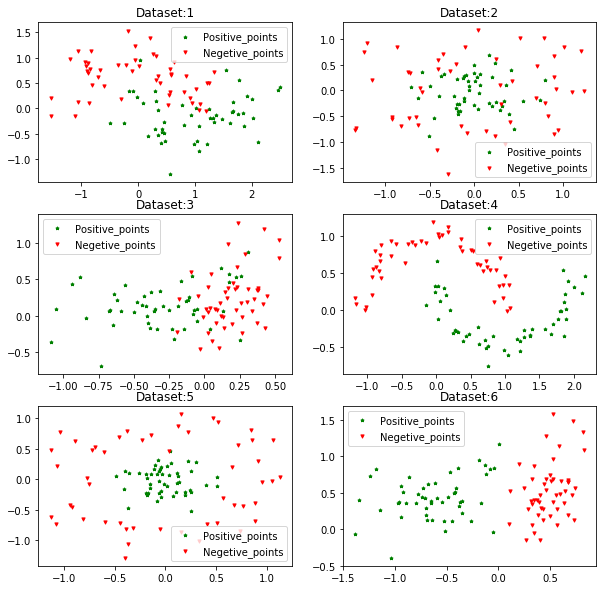

In [2]:
datasets=[]
for i in range(6):
    datasets.append((np.load('X{}.npy'.format(i)),np.load('y{}.npy'.format(i))))
#Part 0
#Visualizing
plt.figure(figsize=[10,10])
for i in range(6):
    X = datasets[i][0]
    Y = datasets[i][1]   
    plt.subplot(3,2,i+1)
    plt.title("Dataset:{}".format(i+1))
    plt.scatter(X[(Y>0),0], X[(Y>0),1], s=10, c='g', marker="*", label='Positive_points')
    plt.scatter(X[(Y==0),0], X[(Y==0),1], s=10, c='r', marker="v", label='Negetive_points')
    plt.legend()

No handles with labels found to put in legend.


Model on dataset 1
Accuracy score on trainset: 0.9333333333333333
Accuracy score on testset: 1.0



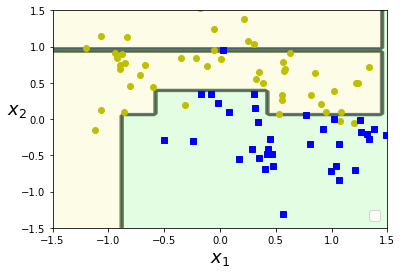

No handles with labels found to put in legend.


Model on dataset 2
Accuracy score on trainset: 0.6333333333333333
Accuracy score on testset: 1.0



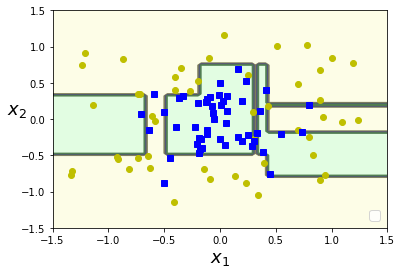

No handles with labels found to put in legend.


Model on dataset 3
Accuracy score on trainset: 0.8333333333333334
Accuracy score on testset: 1.0



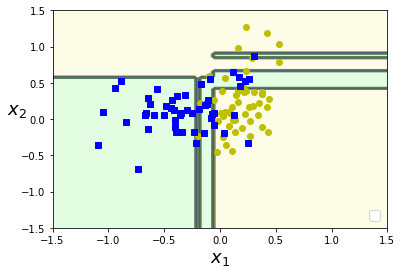

No handles with labels found to put in legend.


Model on dataset 4
Accuracy score on trainset: 0.9666666666666667
Accuracy score on testset: 1.0



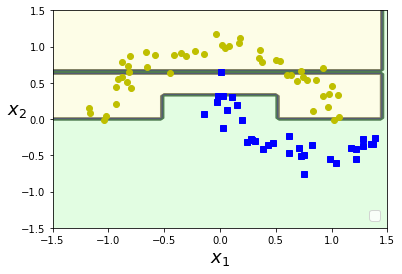

No handles with labels found to put in legend.


Model on dataset 5
Accuracy score on trainset: 0.8666666666666667
Accuracy score on testset: 1.0



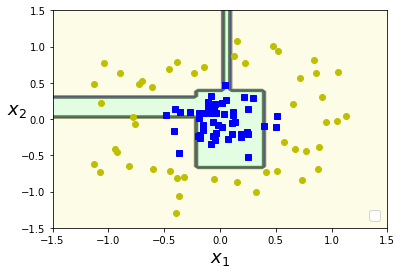

No handles with labels found to put in legend.


Model on dataset 6
Accuracy score on trainset: 1.0
Accuracy score on testset: 1.0



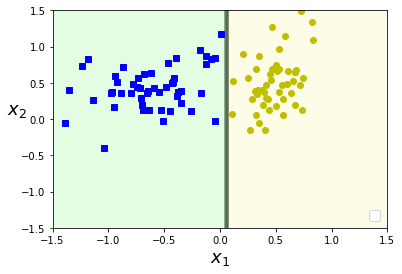

In [13]:
#Part 2
for i in range(6):
    X = datasets[i][0]
    Y = datasets[i][1]  
    #Part 1
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)
    model = DecisionTreeClassifier().fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    acc_test = accuracy_score(Y_test,y_pred)
    print("Model on dataset {}".format(i+1))
    print("Accuracy score on trainset: {}".format(acc_test))
    acc_train = accuracy_score(Y_train,y_pred_train)
    print("Accuracy score on testset: {}\n".format(acc_train))
    #Part 4
    plot_decision_boundary(model,X,Y,axes=[-1.5,1.5,-1.5,1.5],legend=True)
    plt.show()

In [4]:
def plot_decision_boundary(tree, X, y, axes=[0, 7.5, 0, 3], legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = tree.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^")
        plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)
        
        

No handles with labels found to put in legend.


Model on dataset 1
Accuracy score on trainset: 0.9666666666666667
Accuracy score on testset: 1.0

Decision boundary


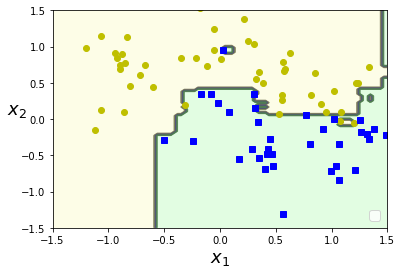

No handles with labels found to put in legend.


Model on dataset 2
Accuracy score on trainset: 0.8
Accuracy score on testset: 0.9714285714285714

Decision boundary


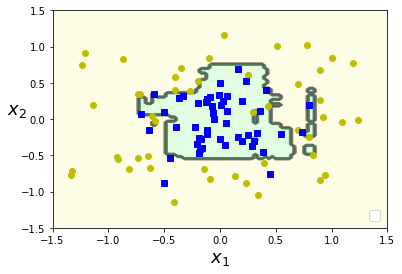

No handles with labels found to put in legend.


Model on dataset 3
Accuracy score on trainset: 0.8333333333333334
Accuracy score on testset: 1.0

Decision boundary


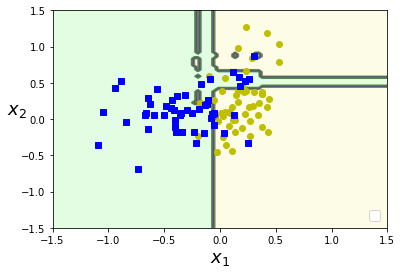

No handles with labels found to put in legend.


Model on dataset 4
Accuracy score on trainset: 0.9666666666666667
Accuracy score on testset: 0.9857142857142858

Decision boundary


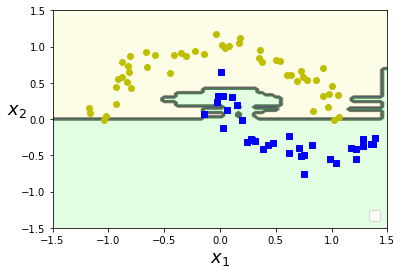

Model on dataset 5
Accuracy score on trainset: 0.9333333333333333
Accuracy score on testset: 1.0

Decision boundary


No handles with labels found to put in legend.


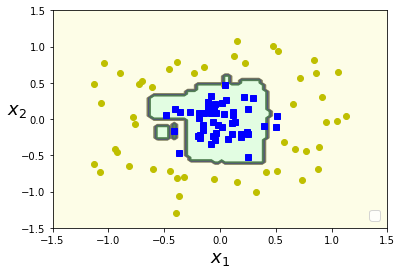

No handles with labels found to put in legend.


Model on dataset 6
Accuracy score on trainset: 1.0
Accuracy score on testset: 1.0

Decision boundary


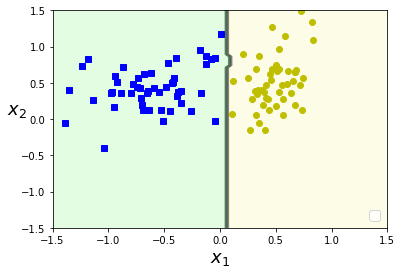

In [12]:
#Part 3
for i in range(6):
    X = datasets[i][0]
    Y = datasets[i][1]  
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)
    model = RandomForestClassifier(n_estimators=20).fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    acc_test = accuracy_score(Y_test,y_pred)
    print("Model on dataset {}".format(i+1))
    print("Accuracy score on trainset: {}".format(acc_test))
    acc_train = accuracy_score(Y_train,y_pred_train)
    print("Accuracy score on testset: {}\n".format(acc_train))
    print("Decision boundary")
    #Part 4
    plot_decision_boundary(model,X,Y,axes=[-1.5,1.5,-1.5,1.5],legend=True)
    plt.show()

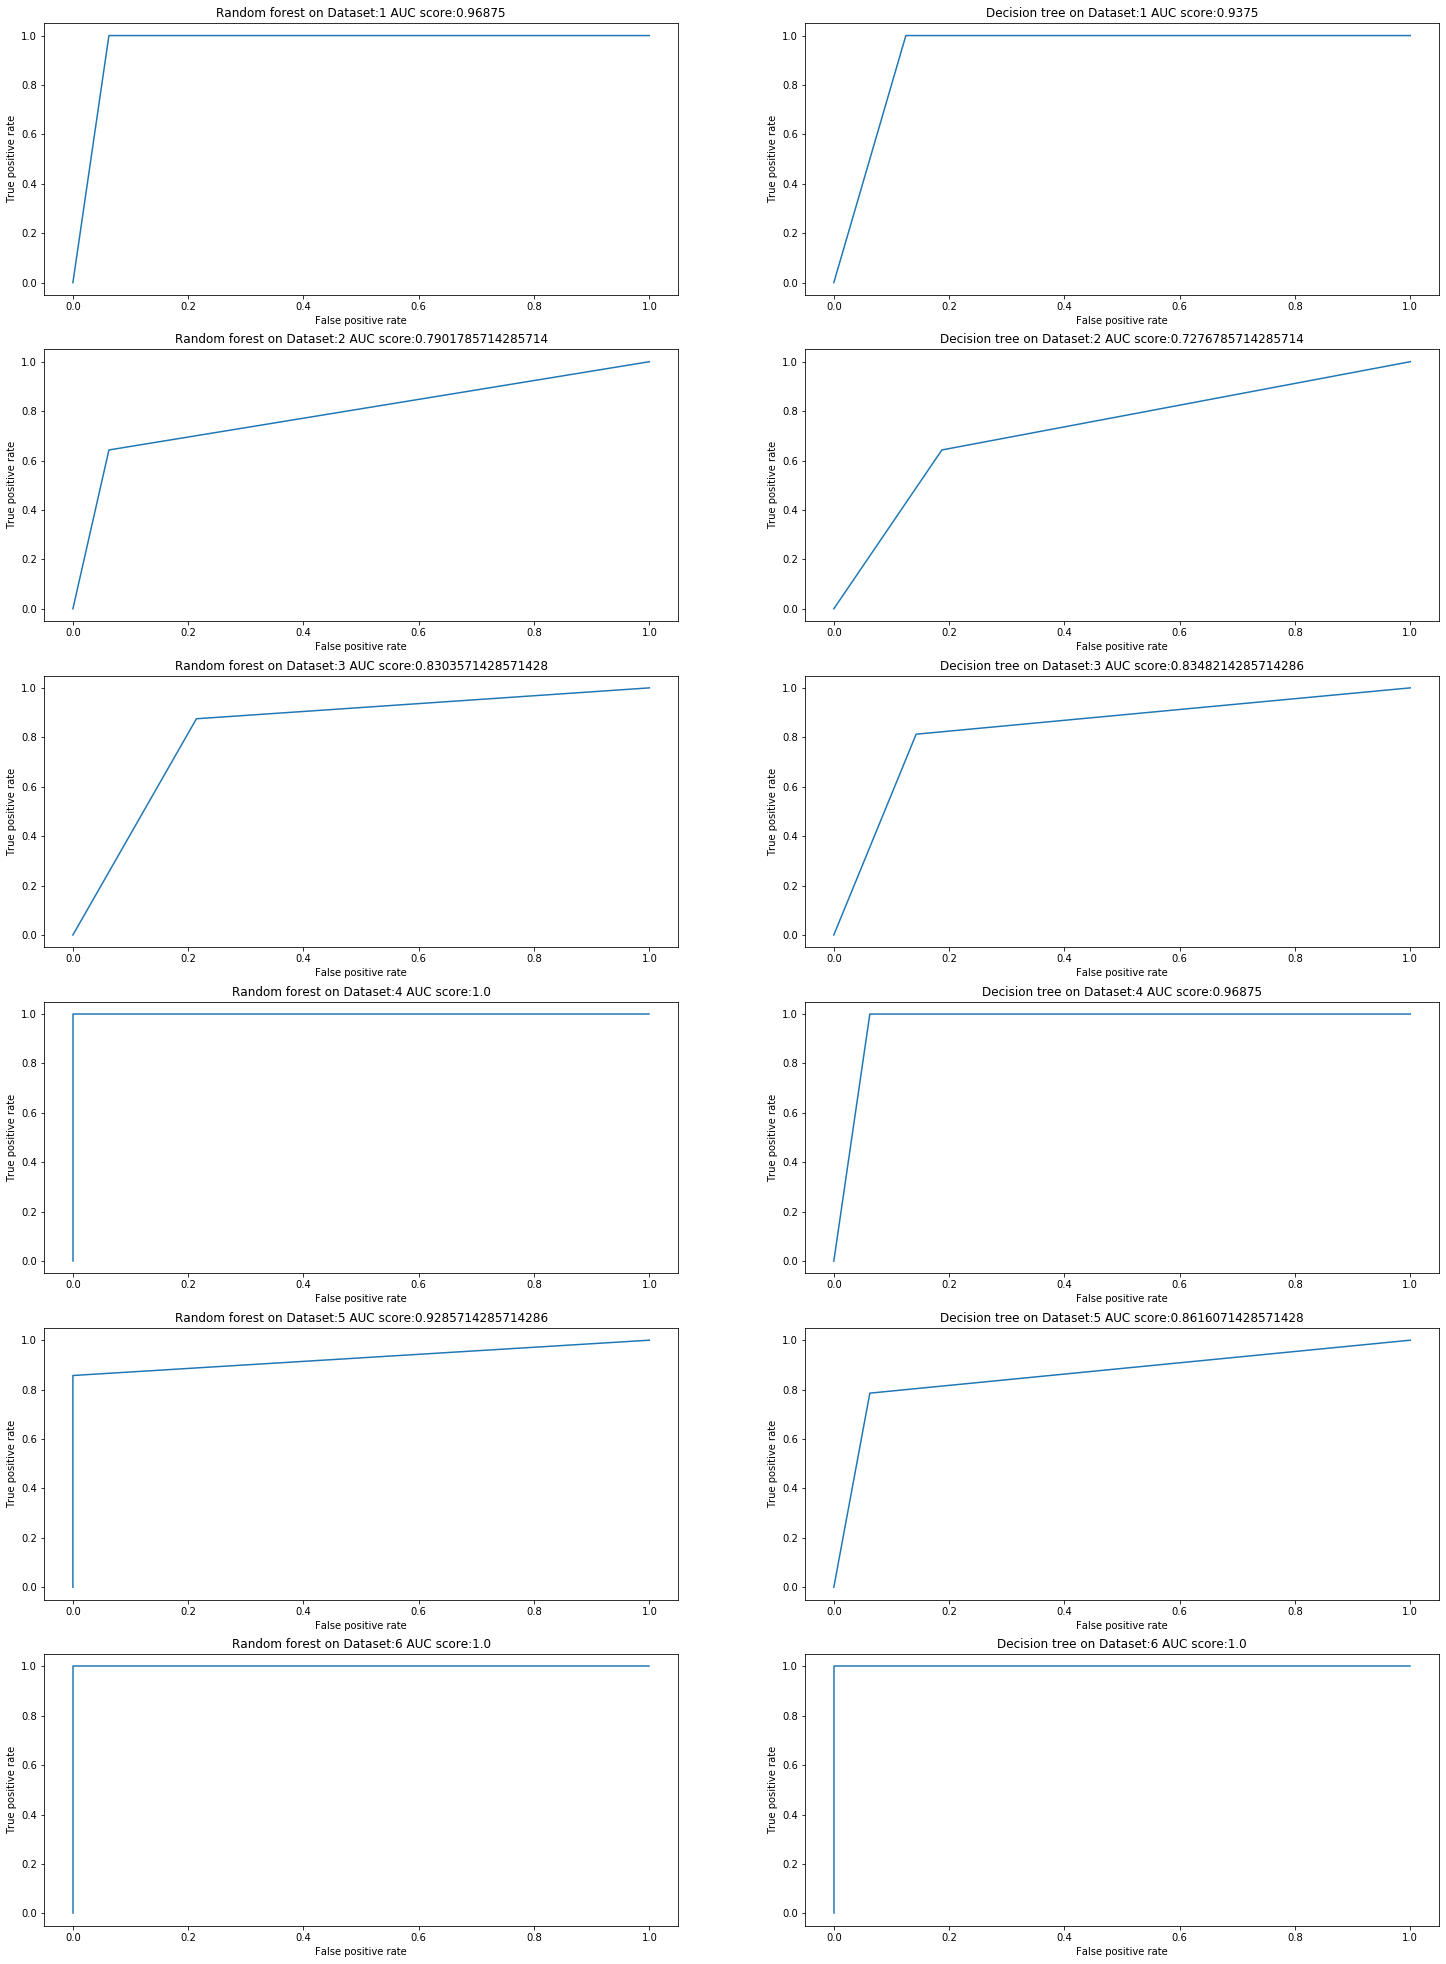

In [24]:
#Part 6
plt.figure(figsize=[25,35])
for i in range(6):
    X = datasets[i][0]
    Y = datasets[i][1]  
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)
    #Random forest
    model = RandomForestClassifier(n_estimators=20).fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    score=roc_auc_score(Y_test,y_pred)
    plt.subplot(6,2,i*2+1)
    plt.title("Random forest on Dataset:{} AUC score:{}".format(i+1,score))
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
    plt.plot(fpr,tpr)    
    #Decision tree
    model = DecisionTreeClassifier().fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    score=roc_auc_score(Y_test,y_pred)
    plt.subplot(6,2,i*2+2)
    plt.title("Decision tree on Dataset:{} AUC score:{}".format(i+1,score))
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
    plt.plot(fpr,tpr)
    
    

## Digit Classification
In this exercise you will perform handwritten digit classificaiton using random forests and study the effect of hyperparameters on random forests.
1. Load the digits dataset from sklearn and visualize 10 samples.
2. Vary the number of trees in a random forest classifier from 1 to 1000 in 10 logarithmic steps using the np.logspace function and plot the accuracy. Explain the results.
3. Observe the changes in performance when you vary the max depth of trees from 1 to 10 in steps of 1. Draw an accuracy heat-map by varying both the number of trees and max depth. Explain the results. (a heatmap is a 2D array of scalars. In this case the scalar is accuracy and the axes of the matrix vary the depth and number of trees)

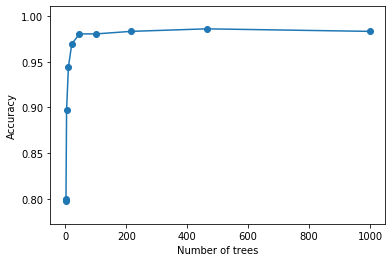

In [35]:
from sklearn import datasets
data = datasets.load_digits()
Y = data.target
X = data.data
#Train test split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

num_trees = [int(n) for n in np.logspace(0,3,10)]
#Accuracy vs num_trees
acc_list = []
for n in num_trees:
    model = RandomForestClassifier(n_estimators=n).fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    acc_test = accuracy_score(Y_test,y_pred)
    acc_list.append(acc_test)
plt.scatter(num_trees,acc_list)
plt.plot(num_trees,acc_list)
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
plt.show()

In [49]:
depth = np.arange(1,11)
x_plot, y_plot = np.meshgrid(depth, num_trees)
X_plot = np.vstack((x_plot.flatten(),y_plot.flatten())).T
z = []
for i in range(len(X_plot)):
    model = RandomForestClassifier(n_estimators=X_plot[i,1],max_depth=X_plot[i,0]).fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    acc_test = accuracy_score(Y_test,y_pred)
    z.append(acc_test)

In [53]:
Z = np.reshape(z,(10,10))

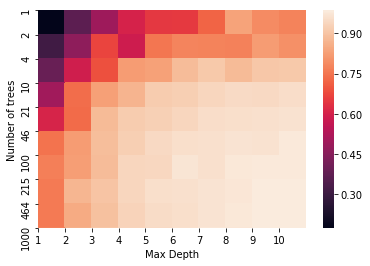

In [88]:
#Plotting
import seaborn as sns
tep = [str(i) for i in num_trees]
tep1 = [str(i) for i in depth]

sns.heatmap(Z)
plt.xlabel("Max Depth")
plt.yticks(np.arange(10),labels = tep)
plt.xticks(np.arange(10),labels=tep1)
plt.ylabel("Number of trees")
plt.show()